PITCH EXTRACTION

In [ ]:
import pitch

p = pitch.find_pitch('1001_IEO_ANG_HI.wav')

print('pitch =', p)

FileNotFoundError: ignored

ENERGY EXTRACTION

In [ ]:
import librosa as lb
import numpy as np
x, sr = lb.load('/content/1001_IEO_ANG_HI.wav')

<ipython-input-4-c53234b3e138>:3: UserWarning: PySoundFile failed. Trying audioread instead.
  x, sr = lb.load('/content/1001_IEO_ANG_HI.wav')
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


FileNotFoundError: ignored

In [ ]:
def rmse(x):
    return np.sum(x**2)

In [ ]:
rmse(x)

NameError: ignored

FORMANTS EXTRACTION

JITTER AND SHIMMER

In [ ]:
#Uploading human.wav audio  file from local storage
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

KeyboardInterrupt: ignored

In [ ]:
#Loading data
fileName = '1001_IEO_ANG_HI.wav'
data, sampling_rate  = librosa.core.load(fileName)
#Playing the audio
Audio(data = data,rate = sampling_rate)

In [ ]:
# Duration : Total duration of the audio
total_samples = data.size
total_duration = int(total_samples/sampling_rate)

In [ ]:
# Fourier Transform from data

fourier_transform = np.fft.rfft(data)

# Frequencies

frequencies = np.abs(fourier_transform)

# Maximum Pitch

max_pitch = np.argmax(frequencies)

In [ ]:
arr = [117]*len(frequencies)

sum_freq = 0

for i in range(0,len(frequencies)):
  if int(frequencies[i])>0 and int(frequencies[i])<int(max_pitch):
    arr[i] = int(frequencies[i])
    sum_freq=sum_freq + i

In [ ]:

# Minmum Pitch
min_pitch = arr.index(min(arr))

In [ ]:
# Mean pitch
mean_pitch=sum_freq/len(frequencies)

In [ ]:
#total energy
energy= np.sum(data**2)
energy_freq = np.sum(frequencies**2)/total_samples
#power
power = energy / total_duration

In [ ]:
plt.figure(1, figsize=(9,6))
plt.subplot(211)
#IntensityMin : Minimum Intensity of the audio signal
Pxx, freqs, bins, im = plt.specgram(data, Fs = sampling_rate, NFFT=1024, cmap=plt.get_cmap('autumn_r'))
col_bar=plt.colorbar(im)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
col_bar.set_label('Intensity dB')
plt.show()
plt.close()

In [ ]:
#minimum intensity
min_intensity = col_bar.vmin
min_intensity

In [ ]:
#maximum intensity
max_intensity = col_bar.vmax
max_intensity

In [ ]:
#mean intensity
mean_intensity = (min_intensity + max_intensity) / 2
mean_intensity


In [ ]:
sound = AudioSegment.from_wav("1001_IEO_ANG_HI.wav")
len(sound)

In [ ]:
chunks = split_on_silence(sound,
    # must be silent for at least half a second
    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-(round(abs(sound.dBFS))+100)
)



#1000 means 1 sec then 60 second means
sixty_seconds = 60 * 1000

second_1_minute = sound[sixty_seconds:120000]
hunks = split_on_silence(second_1_minute,
    # must be silent for at least half a second
    min_silence_len=20,

    # consider it silent if quieter than -16 dBFS
    silence_thresh=-(round(abs(sound.dBFS))+100)
)

In [ ]:
#SPEAKING RATE
speaking_rate=len(hunks)/len(chunks)

In [ ]:
#SILENCES
pauses=detect_silence(sound, min_silence_len=20, silence_thresh=-(round(abs(sound.dBFS))+100), seek_step=1)

#FINDING DURATIONS
sumd=0
ls=[]
for start_i, end_i in pauses:
         dur=int(end_i)-int(start_i)
         ls.append(dur)
breaks=[]

#VOICE BREAKS
for i in ls:
    if i >900:
        breaks.append(i)
#SEPRATING BREAKES AND PAUSES
ls=list(set(ls)-set(breaks))

In [ ]:
#PUASES DURATION
for i in ls:
    sumd=sumd+i

In [ ]:
#TOTAL DURATION OF PAUSES
durp=sumd

In [ ]:
#NO OF PAUSES
nop=len(ls)

In [ ]:
#NO OF VOICE BREAKES
noofVoiceBreaks=len(breaks)

In [ ]:
#FINDING PEAK
peak=scipy.signal.find_peaks(data,rel_height=0.5)

In [ ]:
#MAXIMUM FALLING AND MAXIMUM RISING

MaxFalling=np.amin(data)
MaxRising=np.amax(peak[0])
sums=0

In [ ]:
#JITTER, SHIMMER, JITTERRAP
for i in range(1,len(peak[0])-1):
    sums=sums+abs(20*math.log10(peak[0][i+1]/peak[0][i]))

#SHIMMER
shimmer=sums/(len(peak[0])-1)
peakf=abs(np.fft.fft(peak[0]))
sumps=0
for i in range(1,len(peakf)-1):
    sumps=sumps+(peakf[i+1]**-1)-(peakf[i]**-1)

#JITTER
jitter=sumps/(len(peakf)-1)
sortedp=np.sort(peak[0])
sortedf=abs(np.fft.fft(sortedp))
dif=abs(sortedp[11]-sortedp[15])
suh=0
avgabsdiff=(dif)/4
avgneigh1=(abs(sortedp[6]-sortedp[10]))
avgneigh2=abs(sortedp[17]-sortedp[22])
avg=(dif+avgneigh1+avgneigh2)/3

for i in range(11,16):
    suh=suh+abs(sortedf[i]**-1)
period=suh/5

#JITTERRAP
jitterrap=(avgabsdiff+avg)/period
jitter

In [ ]:
#NUMBER OF RISING, NUMBER OF FALLING, AVERAGE RISE, AVERAGE FALL

noofrise=len(peak[0])

avgtorise=noofrise/len(data)
nooffall=0
for i in data:
    if i == np.amin(data):
        nooffall=nooffall+1

avgtofall=nooffall/len(data)

In [ ]:
print("duration: "+str(total_duration)+"seconds\n")


print("intensityMin: "+str(min_intensity)+"dB\n")
print("intensityMax: "+str(max_intensity)+"dB\n")
print("intensityMean: "+str(mean_intensity)+"dB\n")
print("jitter: "+str(jitter)+"\n")
print("shimmer: "+str(shimmer)+"dB\n")

print("speakRate: "+str(speaking_rate)+"wpm\n")
print("numPauses: "+str(nop)+"\n")
#print("maxDurPauses: "+str(maximum_pause/1000)+"sec\n")
#print("avgDurPauses: "+str(avgp/1000)+"sec\n")
print("TotDurPauses: "+str(durp/1000)+"sec\n")

print("Engaging tone: "+str(MaxFalling)+"\n")

print("NOT Stressed: "+str(avgtofall)+"\n")



SPECTRAL FEATURE SET

In [ ]:
spectral_centroids =  librosa.feature.spectral_centroid(y=x, sr=sr, n_fft=13)[0]
spectral_centroids.shape
spectral_centroids

In [ ]:
spectral_centroids =  librosa.feature.spectral_centroid(y=x , sr=sr)
spectral_bandwidths =  librosa.feature.spectral_bandwidth(y=x, sr=sr)
spectral_contrasts =  librosa.feature.spectral_contrast(y=x, sr=sr)
spectral_flatness =  librosa.feature.spectral_flatness(y=x)
spectral_rolloff =  librosa.feature.spectral_rolloff(y=x, sr=sr)



In [ ]:
spectral_centroids

In [ ]:
spectral_bandwidths

In [ ]:
spectral_contrasts

In [ ]:
spectral_flatness

In [ ]:
spectral_rolloff

In [ ]:
mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)
mfccs.shape

In [ ]:
lpc = librosa.lpc(x, order=12)
lpc

In [ ]:
pip install pitch

In [ ]:
#install packages
!pip install librosa
!pip install wave
!pip install scipy
!pip install pydub
!pip install  soundfile
!pip install pygobject
!pip install Audio

  Preparing metadata (setup.py) ... done
  Created wheel for wave: filename=Wave-0.0.2-py3-none-any.whl size=1221 sha256=c99e3b3c960e3a45350c29c01fe26b56337196cfdfcb8581d039de912bbc6dfb
  Stored in directory: /root/.cache/pip/wheels/f8/24/4d/1b01c0e32da3eb3fd71bbbc6093fcc557ec3b2d9e532ecd65d
Successfully built wave


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.1/347.1 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for pycairo (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo, which is required to install pyproject.toml-based projects
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.5/931.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 42.6 MB/s eta 0:00:00
  error: subprocess-exited-with-

In [ ]:
import math
import wave
import scipy
import librosa
import numpy as np
import librosa.display
import soundfile as sf
from pydub import AudioSegment
from google.colab import files
import matplotlib.pyplot as plt
from IPython.display import Audio
from pydub.utils import db_to_float
from pydub.silence import split_on_silence
from pydub.silence import detect_silence

Features have been written to /content/features.csv


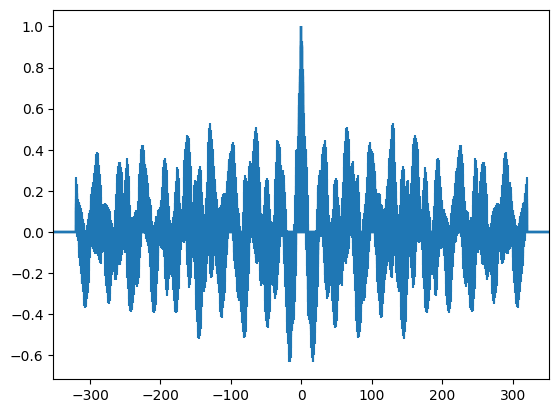

In [ ]:
import os
import csv
import librosa
import numpy as np
import pitch

# Function to compute RMSE
def rmse(x):
    return np.sum(x**2)
    pass

folder_path = '/content/temp_data'

# List all files in the folder
files = os.listdir(folder_path)

# Create a CSV file to write the features
csv_file_path = '/content/features.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

 # Write the header row with feature names
    header = ['File', 'Pitch', 'RMSE', 'LPC', 'MFCCs','Shimmer','Jitter','Emotion']
    csv_writer.writerow(header)

    # Iterate over each file
    for file in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file)

        part=file.split('_')

        if part[2] == 'SAD':
          if part[3] == 'HI':
            file_emotion = 'sadHi'
          elif part[3] == 'MD':
            file_emotion = 'sadMd'
          elif part[3] == 'LO':
            file_emotion = 'sadLo'
          elif part[3] == 'XX':
            file_emotion = 'sadXx'
        elif part[2] == 'ANG':
          if part[3] == 'HI':
            file_emotion = 'angryHi'
          elif part[3] == 'MD':
            file_emotion = 'angryMd'
          elif part[3] == 'LO':
            file_emotion = 'angryLo'
          elif part[3] == 'XX':
            file_emotion = 'angryXx'
        elif part[2] == 'DIS':
          if part[3] == 'HI':
            file_emotion = 'disgustHi'
          elif part[3] == 'MD':
            file_emotion = 'disgustMd'
          elif part[3] == 'LO':
            file_emotion = 'disgustLo'
          elif part[3] == 'XX':
            file_emotion = 'disgustXx'
        elif part[2] == 'FEA':
          if part[3] == 'HI':
            file_emotion = 'fearHi'
          elif part[3] == 'MD':
            file_emotion = 'fearMd'
          elif part[3] == 'LO':
            file_emotion = 'fearLo'
          elif part[3] == 'XX':
            file_emotion = 'fearXx'
        elif part[2] == 'HAP':
          if part[3] == 'HI':
            file_emotion = 'happyHi'
          elif part[3] == 'MD':
            file_emotion = 'happyMd'
          elif part[3] == 'LO':
            file_emotion = 'happyLo'
          elif part[3] == 'XX':
            file_emotion = 'happyXx'
        elif part[2] == 'NEU':
          if part[3] == 'HI':
            file_emotion = 'neutralHi'
          elif part[3] == 'MD':
            file_emotion = 'neutralMd'
          elif part[3] == 'LO':
            file_emotion = 'neutralLo'
          elif part[3] == 'XX':
            file_emotion = 'neutralXx'
        else:
            file_emotion = 'Unknown'

        # Load audio file
        x, sr = librosa.load(file_path)

        # Find pitch
        p = pitch.find_pitch(file_path)

        # Compute RMSE
        rmse_value = rmse(x)

        # Compute LPC
        lpc = librosa.lpc(x, order=13)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)

        # Flatten MFCCs into a 1D array for simplicity (you may need to adapt this based on your needs)
        mfccs_flat = np.ravel(mfccs)

        sums=0

        peak=scipy.signal.find_peaks(x,rel_height=0.5)

        #JITTER, SHIMMER, JITTERRAP
        for i in range(1,len(peak[0])-1):
          sums=sums+abs(20*math.log10(peak[0][i+1]/peak[0][i]))

        #SHIMMER
        shimmer=sums/(len(peak[0])-1)
        peakf=abs(np.fft.fft(peak[0]))
        sumps=0
        for i in range(1,len(peakf)-1):
          sumps=sumps+(peakf[i+1]**-1)-(peakf[i]**-1)


        #JITTER
        jitter=sumps/(len(peakf)-1)
        sortedp=np.sort(peak[0])
        sortedf=abs(np.fft.fft(sortedp))
        dif=abs(sortedp[11]-sortedp[15])
        suh=0
        avgabsdiff=(dif)/4
        avgneigh1=(abs(sortedp[6]-sortedp[10]))
        avgneigh2=abs(sortedp[17]-sortedp[22])
        avg=(dif+avgneigh1+avgneigh2)/3

        for i in range(11,16):
          suh=suh+abs(sortedf[i]**-1)
        period=suh/5



        # Write the row to the CSV file
        row = [file, p, rmse_value, lpc, mfccs_flat,shimmer,jitter,file_emotion]
        csv_writer.writerow(row)

# Print a message indicating the completion
print(f'Features have been written to {csv_file_path}')



In [ ]:
print(lpc_lst)

In [ ]:
# importing library
import numpy

# initializing list
lst = [1, 7, 0, 6, 2, 5, 6]

# converting list to array
arr = numpy.array(lst)

# displaying list
print ("List: ", lst)

# displaying array
print ("Array: ", arr)
print(arr.shape)

NameError: ignored

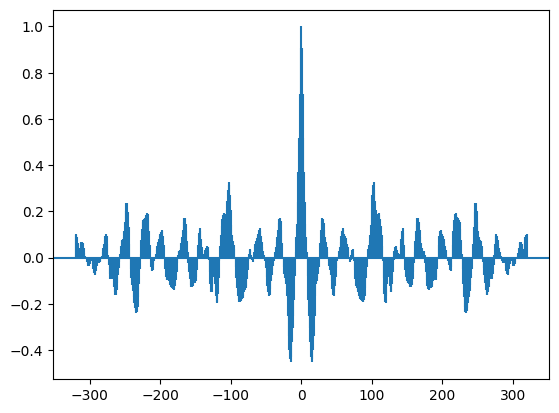

In [ ]:
import os
import csv
import librosa
import numpy as np
import pitch  # Assuming you have a pitch module for finding pitch

# Function to compute RMSE
def rmse(x):
    # Your implementation of RMSE here
    pass

# Set the folder path
folder_path = '/content/temp_data'

# List all files in the folder
files = os.listdir(folder_path)

# Create a CSV file to write the features
csv_file_path = '/content/features.csv'

# Open the CSV file in write mode
with open(csv_file_path, 'w', newline='') as csvfile:
    # Create a CSV writer object
    csv_writer = csv.writer(csvfile)

    # Write the header row with feature names
    header = ['File', 'Pitch', 'RMSE', 'LPC', 'MFCCs','Shimmer','Jitter','Emotion']
    csv_writer.writerow(header)

    # Iterate over each file
    for file in files:
        # Construct the full path to the file
        file_path = os.path.join(folder_path, file)

        part=file.split('_')
        if part[2] == 'SAD':
            file_emotion = 'sad'
        elif part[2] == 'ANG':
            file_emotion = 'angry'
        elif part[2] == 'DIS':
            file_emotion = 'disgust'
        elif part[2] == 'FEA':
            file_emotion = 'fear'
        elif part[2] == 'HAP':
            file_emotion  = 'happy'
        elif part[2] == 'NEU':
            file_emotion = 'neutral'
        else:
            file_emotion = 'Unknown'


        # Load audio file
        x, sr = librosa.load(file_path)

        peak=scipy.signal.find_peaks(x,rel_height=0.5)

        # Find pitch
        p = pitch.find_pitch(file_path)

        # Compute RMSE
        rmse_value = rmse(x)

        # Compute LPC
        lpc = librosa.lpc(x, order=13)

        # Compute MFCCs
        mfccs = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=13)

        # Flatten MFCCs into a 1D array for simplicity (you may need to adapt this based on your needs)
        mfccs_flat = np.ravel(mfccs)

        #shimmer
        shimmer=sums/(len(peak[0])-1)

        #jitter
        jitter=sumps/(len(peakf)-1)


        # Write the row to the CSV file
        row = [file, p, rmse_value, lpc, mfccs_flat, shimmer, jitter, file_emotion]
        csv_writer.writerow(row)

# Print a message indicating the completion
print(f'Features have been written to {csv_file_path}')



In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# tạo dataframe cho đường dẫn
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()
print(Crema_df.Emotions.value_counts())

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Initialize lists to store evaluation metrics for each fold
precision_scores = []
recall_scores = []
f1_scores = []
confusion_matrices = []

# Step 1: Load CSV file
file_path_1 = '/content/features_final.csv'
file_path_2 = '/content/final_features_(1).csv'
file_path = [file_path_1,file_path_2]
data = pd.read_csv(file_path)
# Step 2: Preprocess data if needed

# Step 3: Convert string labels to numeric values
label_encoder = LabelEncoder()
data['Emotion'] = label_encoder.fit_transform(data['Emotion'])

# Step 4: Split into features and labels
X = data.drop(['File','Emotion'], axis=1)
y = data['Emotion']

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Step 5: Create an SVM model
svm_model = SVC()

# Step 6: Perform K-fold cross-validation
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Define variables outside the loop
y_true_all = []
y_pred_all = []

for i, (train_index, test_index) in enumerate(kfold.split(X_standardized)):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X_standardized[train_index], X_standardized[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model on the training set
    svm_model.fit(X_train, y_train)

    # Make predictions on the testing set
    y_pred = svm_model.predict(X_test)

    # Append true and predicted labels for computing overall metrics
    y_true_all.extend(y_test)
    y_pred_all.extend(y_pred)

    # Compute evaluation metrics for this fold
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Append the metrics to the lists
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    confusion_matrices.append(confusion_mat)

    # Print the evaluation metrics for each fold
    print(f'\nFold {i + 1} Metrics:')
    print(f'Precision = {precision:.4f}')
    print(f'Recall = {recall:.4f}')
    print(f'F1 Score = {f1:.4f}')
    print(f'Confusion Matrix:\n{confusion_mat}')

# Compute overall metrics using all folds
overall_precision = precision_score(y_true_all, y_pred_all, average='weighted')
overall_recall = recall_score(y_true_all, y_pred_all, average='weighted')
overall_f1 = f1_score(y_true_all, y_pred_all, average='weighted')
overall_confusion_mat = confusion_matrix(y_true_all, y_pred_all)

# Print overall metrics
print('\nOverall Metrics:')
print(f'Overall Precision = {overall_precision:.4f}')
print(f'Overall Recall = {overall_recall:.4f}')
print(f'Overall F1 Score = {overall_f1:.4f}')
print(f'Overall Confusion Matrix:\n{overall_confusion_mat}')

ValueError: ignored

In [ ]:
data


,File,Pitch,RMSE,LPC_1,LPC_2,LPC_3,LPC_4,LPC_5,LPC_6,LPC_7,...,MFCC_8,MFCC_9,MFCC_10,MFCC_11,MFCC_12,MFCC_13,Intensity,Shimmer,Jitter,Emotion
0,1001_DFA_ANG_XX.wav,152.380952,209.266340,1.0,-3.898185,8.324219,-13.408641,18.219736,-21.557777,22.170070,...,-2.982337,-11.125525,-2.109577,-11.664308,-1.972009,-3.127181,21.249546,0.010453,-9.979865e-23,3
1,1001_DFA_DIS_XX.wav,155.339806,25.663290,1.0,-3.638125,7.463284,-11.862913,16.088005,-19.017500,19.544632,...,7.696455,-11.807550,-1.607505,-9.029036,-5.325351,-0.126413,30.453890,0.009139,3.997685e-23,3
2,1001_DFA_FEA_XX.wav,64.257028,281.097630,1.0,-3.629940,7.349434,-11.626152,15.788427,-18.640438,19.123080,...,-0.038774,-7.281857,-3.811908,-12.299890,-4.942387,-3.586811,18.413702,0.011969,-2.289907e-23,3
3,1001_DFA_HAP_XX.wav,153.846154,170.690050,1.0,-3.763802,7.894371,-12.692317,17.324692,-20.566866,21.127888,...,0.222240,-10.304431,-6.165375,-14.998136,-2.926191,-2.536832,21.481194,0.012659,-6.247866e-23,3
4,1001_DFA_NEU_XX.wav,121.212121,41.776196,1.0,-3.841575,8.198309,-13.263777,18.122559,-21.648933,22.515097,...,-2.361498,-10.503442,-4.843659,-10.041851,-0.964123,-3.805397,27.888028,0.010895,-4.758534e-23,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6182,1076_MTI_ANG_XX.wav,164.948454,47.695587,1.0,-3.854195,8.371014,-13.867953,19.077396,-22.660717,23.422329,...,4.337343,-9.309599,-0.789538,-2.036056,-2.124747,2.438604,29.264791,0.011877,5.216409e-23,3
6183,1076_MTI_DIS_XX.wav,166.666667,12.226431,1.0,-3.466044,6.832426,-11.066449,15.224237,-17.920988,18.502560,...,10.040895,-12.943854,2.400449,-2.248803,-2.723793,6.491437,36.678125,0.008142,4.010422e-24,3
6184,1076_MTI_FEA_XX.wav,195.121951,22.700330,1.0,-3.464901,6.820696,-11.076640,15.247892,-17.927084,18.495165,...,9.219095,-10.917192,-0.098593,-3.458618,-4.455704,6.369731,33.238499,0.009877,5.748188e-23,3
6185,1076_MTI_HAP_XX.wav,250.000000,31.617247,1.0,-3.803872,7.893882,-12.851950,17.783138,-21.089960,21.739090,...,10.535565,-13.758583,-1.392124,-4.660726,-5.381078,5.889987,31.820215,0.012170,-1.212651e-23,3
